In [1]:
import torch
from dataset.utils import *
from losses import *
from utils import *
from net.resnet import *
from net.googlenet import *
from net.bn_inception import *
from net.pfe import *
from train import train_model
import pytorch_metric_learning as pml

In [2]:
def redefine_train_parameters():
    global device, epochs, learning_rate, loss_lr, num_classes, embedding_size
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    epochs = 5
    learning_rate = 0.001
    loss_lr = 0.01
    num_classes = get_num_classes(train_dataset)
    embedding_size = 512

In [4]:
batch_size = 128
train_dataset = make_dataset('LFW', split='train', image_size=100)
test_dataset = make_dataset('LFW', split='test', image_size=100)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

Files already downloaded and verified
Files already downloaded and verified


In [36]:
fetch_time(train_loader)

0.13792657852172852

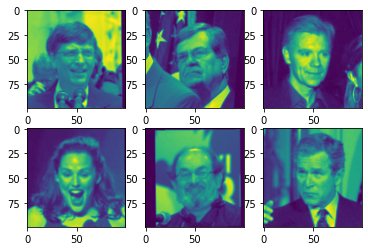

In [37]:
display_images(train_loader, h=2,w=3)

In [4]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.11%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00        19
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         3
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
evaluate_cos(model, test_loader)

100%|██████████| 29/29 [00:04<00:00,  7.17it/s]


R@1 : 6.041
R@2 : 9.008
R@4 : 12.082
R@8 : 16.721
R@16 : 22.276
R@32 : 27.724


[0.06040992448759439,
 0.09007551240560949,
 0.12081984897518878,
 0.16720604099244876,
 0.22276159654800431,
 0.2772384034519957]

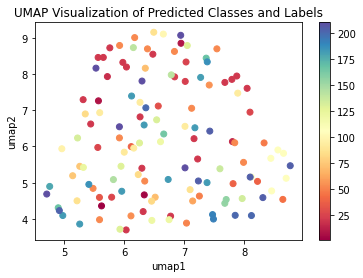

In [40]:
visualize_umap(model, test_loader)

In [47]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor_lib',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    use_loss_optimizer=True,
                    save_path='./saved_models/resnet50_lfw_proxy_library.ptm')

Step: [10/75] Epoch [1/20] Loss: 1.4652 Time: 1.8942
Step: [20/75] Epoch [1/20] Loss: 2.8836 Time: 3.7813
Step: [30/75] Epoch [1/20] Loss: 4.3009 Time: 5.6355
Step: [40/75] Epoch [1/20] Loss: 5.7010 Time: 7.5350
Step: [50/75] Epoch [1/20] Loss: 7.1188 Time: 9.4040
Step: [60/75] Epoch [1/20] Loss: 8.5091 Time: 11.2880
Step: [70/75] Epoch [1/20] Loss: 9.8989 Time: 13.1717
Step: [75/75] Epoch [1/20] Loss: 10.5611 Time: 14.0231
Epoch [1/20] Loss: 10.5611 Time: 14.0236
Step: [10/75] Epoch [2/20] Loss: 1.0503 Time: 15.8746
Step: [20/75] Epoch [2/20] Loss: 2.0723 Time: 17.7736
Step: [30/75] Epoch [2/20] Loss: 3.1251 Time: 19.6647
Step: [40/75] Epoch [2/20] Loss: 4.2831 Time: 21.5287
Step: [50/75] Epoch [2/20] Loss: 5.3920 Time: 23.4030
Step: [60/75] Epoch [2/20] Loss: 6.5305 Time: 25.3621
Step: [70/75] Epoch [2/20] Loss: 7.6386 Time: 27.3513
Step: [75/75] Epoch [2/20] Loss: 8.1618 Time: 28.2000
Epoch [2/20] Loss: 8.1618 Time: 28.2004
Step: [10/75] Epoch [3/20] Loss: 0.9668 Time: 30.1102
Step:

Step: [20/75] Epoch [18/20] Loss: 1.0002 Time: 238.7695
Step: [30/75] Epoch [18/20] Loss: 1.4958 Time: 240.6046
Step: [40/75] Epoch [18/20] Loss: 1.9880 Time: 242.4417
Step: [50/75] Epoch [18/20] Loss: 2.4839 Time: 244.2970
Step: [60/75] Epoch [18/20] Loss: 2.9873 Time: 246.1510
Step: [70/75] Epoch [18/20] Loss: 3.4890 Time: 247.9911
Step: [75/75] Epoch [18/20] Loss: 3.7297 Time: 248.8162
Epoch [18/20] Loss: 3.7297 Time: 248.8166
Step: [10/75] Epoch [19/20] Loss: 0.4726 Time: 250.7536
Step: [20/75] Epoch [19/20] Loss: 0.9472 Time: 252.6497
Step: [30/75] Epoch [19/20] Loss: 1.4359 Time: 254.4997
Step: [40/75] Epoch [19/20] Loss: 1.9232 Time: 256.3419
Step: [50/75] Epoch [19/20] Loss: 2.4036 Time: 258.1915
Step: [60/75] Epoch [19/20] Loss: 2.8748 Time: 260.0387
Step: [70/75] Epoch [19/20] Loss: 3.3545 Time: 261.8799
Step: [75/75] Epoch [19/20] Loss: 3.5739 Time: 262.6830
Epoch [19/20] Loss: 3.5739 Time: 262.6834
Step: [10/75] Epoch [20/20] Loss: 0.4669 Time: 264.5209
Step: [20/75] Epoch 

In [5]:
model = torch.load('./saved_models/resnet50_lfw_proxy_library.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00      19.0
          23       0.00      0.00      0.00       2.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       3.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
evaluate_cos(model, test_loader)

100%|██████████| 29/29 [00:04<00:00,  6.92it/s]


R@1 : 2.400
R@2 : 4.072
R@4 : 6.203
R@8 : 9.412
R@16 : 13.808
R@32 : 18.797


[0.02400215749730313,
 0.040722761596548,
 0.06202804746494067,
 0.09412081984897519,
 0.13807982740021574,
 0.18797195253505933]

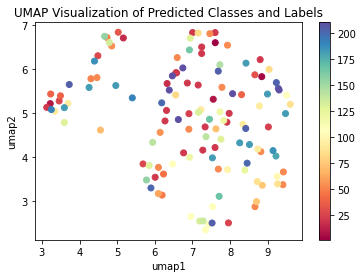

In [50]:
visualize_umap(model, test_loader)

In [7]:
batch_size = 128
train_dataset = make_dataset('LFWCustom', split='train', max_classes=10, min_samples=50, image_size=100)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=10, min_samples=50, image_size=100)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

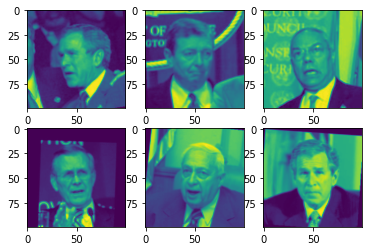

In [64]:
display_images(train_loader, h=2,w=3)

In [8]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      25.0
           1       0.00      0.00      0.00      77.0
           2       0.00      0.00      0.00      39.0
           3       0.00      0.00      0.00     174.0
           4       0.00      0.00      0.00      35.0
           5       0.00      0.00      0.00      23.0
           6       0.00      0.00      0.00      17.0
           7       0.00      0.00      0.00      18.0
           8       0.00      0.00      0.00      17.0
           9       0.00      0.00      0.00      19.0
         139       0.00      0.00      0.00       0.0
         175       0.00      0.00      0.00       0.0
         207       0.00      0.00      0.00       0.0
         278       0.00      0.00      0.00       0.0
         287       0.00      0.00      0.00       0.0
         335       0.00      0.00      0.00       0.0
         337       0.00      0.00      0.00       0.0
      

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  8.07it/s]


R@1 : 35.811
R@2 : 52.027
R@4 : 69.820
R@8 : 81.081
R@16 : 91.441
R@32 : 97.297


[0.3581081081081081,
 0.5202702702702703,
 0.6981981981981982,
 0.8108108108108109,
 0.9144144144144144,
 0.972972972972973]

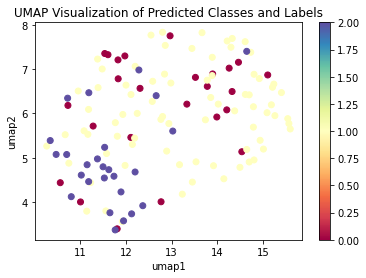

In [11]:
visualize_umap(model, test_loader)

Progress: 1/4 batch
Progress: 2/4 batch
Progress: 3/4 batch
Progress: 4/4 batch


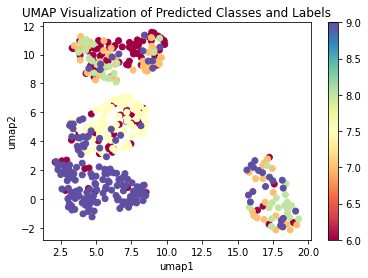

In [10]:
visualize_umap(model, test_loader, mode=1)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


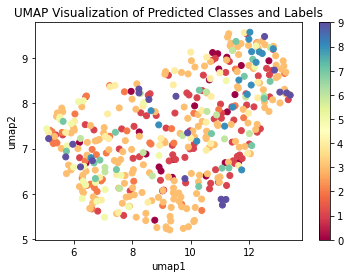

In [9]:
visualize_umap(model, test_loader, mode=2)

In [30]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor_lib',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_proxy.ptm',
                    verbose=2)

Step: [8/8] Epoch [1/20] Loss: 12.1838 Time: 1.5610
Epoch [1/20] Loss: 12.1838 Time: 1.5613
Step: [8/8] Epoch [2/20] Loss: 9.9717 Time: 2.9285
Epoch [2/20] Loss: 9.9717 Time: 2.9291
Step: [8/8] Epoch [3/20] Loss: 7.8293 Time: 4.2647
Epoch [3/20] Loss: 7.8293 Time: 4.2650
Step: [8/8] Epoch [4/20] Loss: 5.8099 Time: 5.6134
Epoch [4/20] Loss: 5.8099 Time: 5.6137
Step: [8/8] Epoch [5/20] Loss: 5.8611 Time: 6.9280
Epoch [5/20] Loss: 5.8611 Time: 6.9283
Step: [8/8] Epoch [6/20] Loss: 5.5383 Time: 8.2993
Epoch [6/20] Loss: 5.5383 Time: 8.2996
Step: [8/8] Epoch [7/20] Loss: 3.0057 Time: 9.6443
Epoch [7/20] Loss: 3.0057 Time: 9.6448
Step: [8/8] Epoch [8/20] Loss: 1.3915 Time: 11.0096
Epoch [8/20] Loss: 1.3915 Time: 11.0099
Step: [8/8] Epoch [9/20] Loss: 1.1999 Time: 12.3790
Epoch [9/20] Loss: 1.1999 Time: 12.3795
Step: [8/8] Epoch [10/20] Loss: 1.2447 Time: 13.7463
Epoch [10/20] Loss: 1.2447 Time: 13.7469
Step: [8/8] Epoch [11/20] Loss: 0.7871 Time: 15.1083
Epoch [11/20] Loss: 0.7871 Time: 15.1

In [12]:
model = torch.load('./saved_models/resnet50_lfw10_proxy.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      25.0
           1       0.00      0.00      0.00      77.0
           2       0.00      0.00      0.00      39.0
           3       0.00      0.00      0.00     174.0
           4       0.00      0.00      0.00      35.0
           5       0.00      0.00      0.00      23.0
           6       0.00      0.00      0.00      17.0
           7       0.00      0.00      0.00      18.0
           8       0.00      0.00      0.00      17.0
           9       0.00      0.00      0.00      19.0
          69       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       0.0
          87       0.00      0.00      0.00       0.0
         122       0.00      0.00      0.00       0.0
         158       0.00      0.00      0.00       0.0
         170       0.00      0.00      0.00       0.0
         223       0.00      0.00      0.00       0.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  8.35it/s]


R@1 : 96.171
R@2 : 97.072
R@4 : 97.748
R@8 : 97.973
R@16 : 98.198
R@32 : 98.423


[0.9617117117117117,
 0.9707207207207207,
 0.9774774774774775,
 0.9797297297297297,
 0.9819819819819819,
 0.9842342342342343]

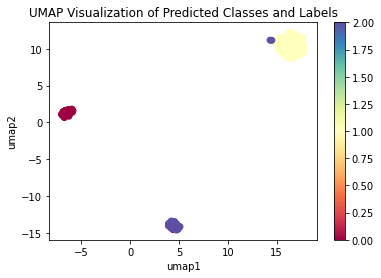

In [13]:
visualize_umap(model, test_loader)

Progress: 1/4 batch
Progress: 2/4 batch
Progress: 3/4 batch
Progress: 4/4 batch


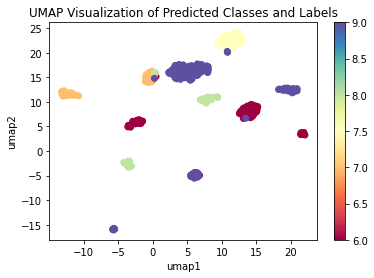

In [14]:
visualize_umap(model, test_loader, mode=1)

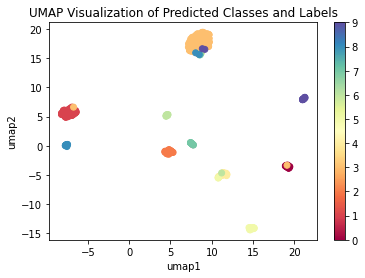

In [15]:
visualize_umap(model, test_loader, mode=2)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_nca',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_proxynca.ptm',
                    verbose=2)

Step: [8/8] Epoch [1/20] Loss: 1.6882 Time: 3.6643
Epoch [1/20] Loss: 1.6882 Time: 3.6645
Step: [8/8] Epoch [2/20] Loss: 1.1319 Time: 5.0414
Epoch [2/20] Loss: 1.1319 Time: 5.0417
Step: [8/8] Epoch [3/20] Loss: 0.9227 Time: 6.3984
Epoch [3/20] Loss: 0.9227 Time: 6.3989
Step: [8/8] Epoch [4/20] Loss: 0.8608 Time: 7.7582
Epoch [4/20] Loss: 0.8608 Time: 7.7584
Step: [8/8] Epoch [5/20] Loss: 0.8290 Time: 9.1238
Epoch [5/20] Loss: 0.8290 Time: 9.1243
Step: [8/8] Epoch [6/20] Loss: 0.7999 Time: 10.4996
Epoch [6/20] Loss: 0.7999 Time: 10.4998
Step: [8/8] Epoch [7/20] Loss: 0.7774 Time: 11.8674
Epoch [7/20] Loss: 0.7774 Time: 11.8676
Step: [8/8] Epoch [8/20] Loss: 0.7585 Time: 13.2442
Epoch [8/20] Loss: 0.7585 Time: 13.2448
Step: [8/8] Epoch [9/20] Loss: 0.7522 Time: 14.5780
Epoch [9/20] Loss: 0.7522 Time: 14.5786
Step: [8/8] Epoch [10/20] Loss: 0.7474 Time: 15.9419
Epoch [10/20] Loss: 0.7474 Time: 15.9424
Step: [8/8] Epoch [11/20] Loss: 0.7474 Time: 17.2833
Epoch [11/20] Loss: 0.7474 Time: 17

In [6]:
model = torch.load('./saved_models/resnet50_lfw10_proxynca.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  7.97it/s]


R@1 : 94.820
R@2 : 97.072
R@4 : 97.072
R@8 : 97.072
R@16 : 97.523
R@32 : 98.874


[0.9481981981981982,
 0.9707207207207207,
 0.9707207207207207,
 0.9707207207207207,
 0.9752252252252253,
 0.9887387387387387]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


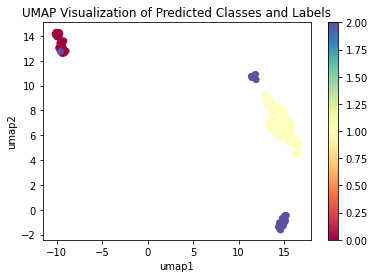

In [8]:
visualize_umap(model, test_loader)

Progress: 1/4 batch
Progress: 2/4 batch
Progress: 3/4 batch
Progress: 4/4 batch


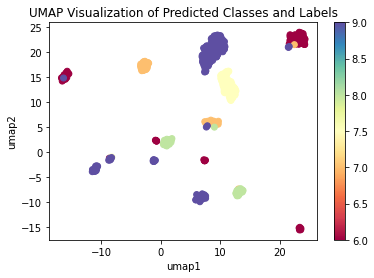

In [9]:
visualize_umap(model, test_loader, mode=1)

In [10]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw10_pfe.ptm',
                    verbose=2)

Step: [8/8] Epoch [1/20] Loss: -2860.9854 Time: 1.0999
Epoch [1/20] Loss: -2860.9854 Time: 1.1000
Step: [8/8] Epoch [2/20] Loss: -2855.6241 Time: 2.1836
Epoch [2/20] Loss: -2855.6241 Time: 2.1838
Step: [8/8] Epoch [3/20] Loss: -2857.3814 Time: 3.2862
Epoch [3/20] Loss: -2857.3814 Time: 3.2863
Step: [8/8] Epoch [4/20] Loss: -2855.7820 Time: 4.3725
Epoch [4/20] Loss: -2855.7820 Time: 4.3735
Step: [8/8] Epoch [5/20] Loss: -2857.3299 Time: 5.4237
Epoch [5/20] Loss: -2857.3299 Time: 5.4245
Step: [8/8] Epoch [6/20] Loss: -2857.6403 Time: 6.5250
Epoch [6/20] Loss: -2857.6403 Time: 6.5257
Step: [8/8] Epoch [7/20] Loss: -2855.1029 Time: 7.6253
Epoch [7/20] Loss: -2855.1029 Time: 7.6254
Step: [8/8] Epoch [8/20] Loss: -2854.6685 Time: 8.7158
Epoch [8/20] Loss: -2854.6685 Time: 8.7160
Step: [8/8] Epoch [9/20] Loss: -2859.5835 Time: 9.7895
Epoch [9/20] Loss: -2859.5835 Time: 9.7900
Step: [8/8] Epoch [10/20] Loss: -2859.8184 Time: 10.8711
Epoch [10/20] Loss: -2859.8184 Time: 10.8716
Step: [8/8] Epoc

In [18]:
model = torch.load('./saved_models/resnet50_lfw10_pfe.ptm')
# evaluate_accuracy(model, test_loader)

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 4/4 [00:00<00:00,  5.77it/s]


R@1 : 31.306
R@2 : 49.775
R@4 : 67.568
R@8 : 81.757
R@16 : 92.117
R@32 : 97.748


[0.3130630630630631,
 0.49774774774774777,
 0.6756756756756757,
 0.8175675675675675,
 0.9211711711711712,
 0.9774774774774775]

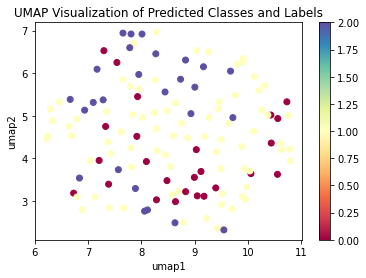

In [13]:
visualize_umap(model, test_loader)

Progress: 1/4 batch
Progress: 2/4 batch
Progress: 3/4 batch
Progress: 4/4 batch


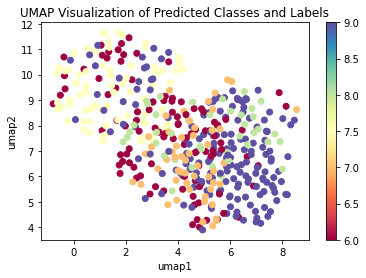

In [14]:
visualize_umap(model, test_loader, mode=1)

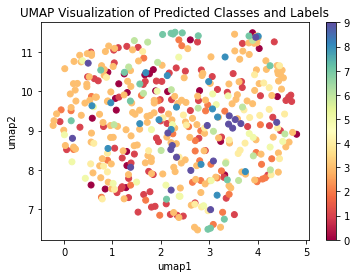

In [19]:
visualize_umap(model, test_loader, mode=2)

In [21]:
batch_size = 1024
train_dataset = make_dataset('CIFAR10', split='train')
test_dataset = make_dataset('CIFAR10', split='test')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

Files already downloaded and verified
Files already downloaded and verified


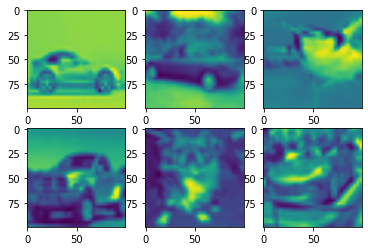

In [4]:
display_images(train_loader, h=2,w=3)

In [22]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.02%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.33      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000
          21       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          45       0.00      0.00      0.00         0
          47       0.00      0.00      0.00         0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
evaluate_cos(model, test_loader)

100%|██████████| 79/79 [00:03<00:00, 19.97it/s]


R@1 : 48.060
R@2 : 63.150
R@4 : 76.630
R@8 : 87.770
R@16 : 94.530
R@32 : 97.990


[0.4806, 0.6315, 0.7663, 0.8777, 0.9453, 0.9799]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


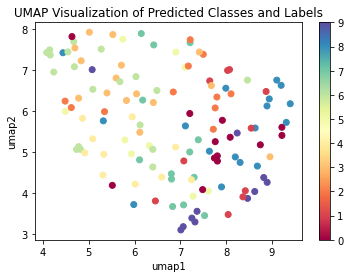

In [7]:
visualize_umap(model, test_loader)

Progress: 1/79 batch
Progress: 2/79 batch
Progress: 3/79 batch
Progress: 4/79 batch
Progress: 5/79 batch
Progress: 6/79 batch
Progress: 7/79 batch
Progress: 8/79 batch
Progress: 9/79 batch
Progress: 10/79 batch
Progress: 11/79 batch
Progress: 12/79 batch
Progress: 13/79 batch
Progress: 14/79 batch
Progress: 15/79 batch
Progress: 16/79 batch
Progress: 17/79 batch
Progress: 18/79 batch
Progress: 19/79 batch
Progress: 20/79 batch
Progress: 21/79 batch
Progress: 22/79 batch
Progress: 23/79 batch
Progress: 24/79 batch
Progress: 25/79 batch
Progress: 26/79 batch
Progress: 27/79 batch
Progress: 28/79 batch
Progress: 29/79 batch
Progress: 30/79 batch
Progress: 31/79 batch
Progress: 32/79 batch
Progress: 33/79 batch
Progress: 34/79 batch
Progress: 35/79 batch
Progress: 36/79 batch
Progress: 37/79 batch
Progress: 38/79 batch
Progress: 39/79 batch
Progress: 40/79 batch
Progress: 41/79 batch
Progress: 42/79 batch
Progress: 43/79 batch
Progress: 44/79 batch
Progress: 45/79 batch
Progress: 46/79 bat

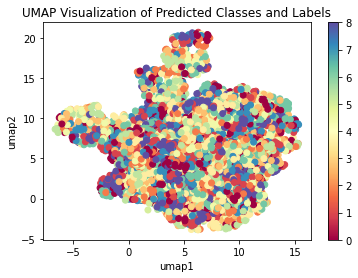

In [8]:
visualize_umap(model, test_loader, mode=1)

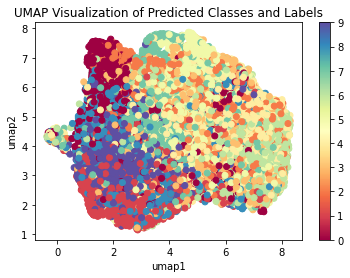

In [23]:
visualize_umap(model, test_loader, mode=2)

In [4]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor_lib',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_cifar10_proxy_library.ptm')

Step: [19/98] Epoch [1/20] Loss: 3.0135 Time: 8.8502
Step: [38/98] Epoch [1/20] Loss: 5.8117 Time: 15.2203
Step: [57/98] Epoch [1/20] Loss: 8.4794 Time: 21.6516
Step: [76/98] Epoch [1/20] Loss: 11.0947 Time: 28.1410
Step: [95/98] Epoch [1/20] Loss: 13.6692 Time: 34.6396
Step: [98/98] Epoch [1/20] Loss: 14.0699 Time: 35.5630
Epoch [1/20] Loss: 14.0699 Time: 35.5656
Step: [19/98] Epoch [2/20] Loss: 2.3132 Time: 42.2465
Step: [38/98] Epoch [2/20] Loss: 4.7124 Time: 48.6924
Step: [57/98] Epoch [2/20] Loss: 7.1101 Time: 55.1664
Step: [76/98] Epoch [2/20] Loss: 9.4780 Time: 61.5809
Step: [95/98] Epoch [2/20] Loss: 11.8300 Time: 67.9389
Step: [98/98] Epoch [2/20] Loss: 12.1862 Time: 68.8354
Epoch [2/20] Loss: 12.1862 Time: 68.8376
Step: [19/98] Epoch [3/20] Loss: 1.9612 Time: 75.4898
Step: [38/98] Epoch [3/20] Loss: 4.1751 Time: 82.0829
Step: [57/98] Epoch [3/20] Loss: 6.4232 Time: 88.5462
Step: [76/98] Epoch [3/20] Loss: 8.5233 Time: 95.0408
Step: [95/98] Epoch [3/20] Loss: 10.6703 Time: 101

In [25]:
model = torch.load('./saved_models/resnet50_cifar10_proxy_library.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1000.0
           1       0.00      0.00      0.00    1000.0
           2       0.00      0.00      0.00    1000.0
           3       0.00      0.00      0.00    1000.0
           4       0.00      0.00      0.00    1000.0
           5       0.00      0.00      0.00    1000.0
           6       0.00      0.00      0.00    1000.0
           7       0.00      0.00      0.00    1000.0
           8       0.00      0.00      0.00    1000.0
           9       0.00      0.00      0.00    1000.0
          10       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       0.0
          32       0.00      0.00      0.00       0.0
          33       0.00      0.00      0.00       0.0
          48       0.00      0.00      0.00       0.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
evaluate_cos(model, test_loader)

100%|██████████| 20/20 [00:03<00:00,  5.06it/s]


R@1 : 91.370
R@2 : 94.010
R@4 : 95.770
R@8 : 96.710
R@16 : 97.360
R@32 : 97.920


[0.9137, 0.9401, 0.9577, 0.9671, 0.9736, 0.9792]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


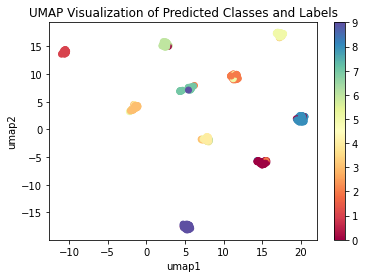

In [7]:
visualize_umap(model, test_loader)

Progress: 1/20 batch
Progress: 2/20 batch
Progress: 3/20 batch
Progress: 4/20 batch
Progress: 5/20 batch
Progress: 6/20 batch
Progress: 7/20 batch
Progress: 8/20 batch
Progress: 9/20 batch
Progress: 10/20 batch
Progress: 11/20 batch
Progress: 12/20 batch
Progress: 13/20 batch
Progress: 14/20 batch
Progress: 15/20 batch
Progress: 16/20 batch
Progress: 17/20 batch
Progress: 18/20 batch
Progress: 19/20 batch
Progress: 20/20 batch


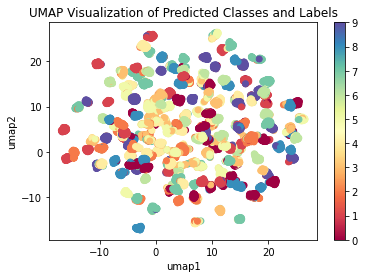

In [8]:
visualize_umap(model, test_loader, mode=1)

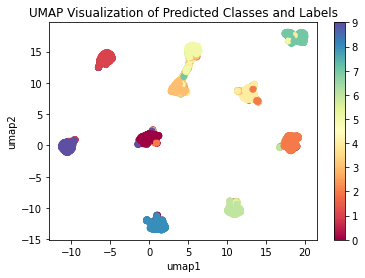

In [26]:
visualize_umap(model, test_loader, mode=2)

In [9]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_cifar10_pfe.ptm',
                    verbose=2)

Step: [10/391] Epoch [1/20] Loss: -72.8400 Time: 0.9696
Step: [20/391] Epoch [1/20] Loss: -145.6310 Time: 1.5893
Step: [30/391] Epoch [1/20] Loss: -218.5148 Time: 2.2102
Step: [40/391] Epoch [1/20] Loss: -291.2630 Time: 2.8357
Step: [50/391] Epoch [1/20] Loss: -364.0591 Time: 3.4601
Step: [60/391] Epoch [1/20] Loss: -436.8588 Time: 4.0820
Step: [70/391] Epoch [1/20] Loss: -509.6744 Time: 4.7023
Step: [80/391] Epoch [1/20] Loss: -582.5147 Time: 5.3232
Step: [90/391] Epoch [1/20] Loss: -655.3544 Time: 5.9461
Step: [100/391] Epoch [1/20] Loss: -728.1823 Time: 6.5684
Step: [110/391] Epoch [1/20] Loss: -800.9763 Time: 7.1876
Step: [120/391] Epoch [1/20] Loss: -873.7800 Time: 7.8119
Step: [130/391] Epoch [1/20] Loss: -946.5645 Time: 8.4333
Step: [140/391] Epoch [1/20] Loss: -1019.3676 Time: 9.0561
Step: [150/391] Epoch [1/20] Loss: -1092.1597 Time: 9.6875
Step: [160/391] Epoch [1/20] Loss: -1165.0260 Time: 10.3188
Step: [170/391] Epoch [1/20] Loss: -1237.7921 Time: 10.9433
Step: [180/391] Ep

Step: [180/391] Epoch [4/20] Loss: -1310.4779 Time: 85.8790
Step: [190/391] Epoch [4/20] Loss: -1383.2384 Time: 86.5043
Step: [200/391] Epoch [4/20] Loss: -1456.0148 Time: 87.1287
Step: [210/391] Epoch [4/20] Loss: -1528.7811 Time: 87.7523
Step: [220/391] Epoch [4/20] Loss: -1601.5831 Time: 88.3703
Step: [230/391] Epoch [4/20] Loss: -1674.4216 Time: 89.0025
Step: [240/391] Epoch [4/20] Loss: -1747.1970 Time: 89.6224
Step: [250/391] Epoch [4/20] Loss: -1819.9673 Time: 90.2418
Step: [260/391] Epoch [4/20] Loss: -1892.7604 Time: 90.8628
Step: [270/391] Epoch [4/20] Loss: -1965.5561 Time: 91.4833
Step: [280/391] Epoch [4/20] Loss: -2038.4250 Time: 92.1029
Step: [290/391] Epoch [4/20] Loss: -2111.2785 Time: 92.7222
Step: [300/391] Epoch [4/20] Loss: -2184.1005 Time: 93.3434
Step: [310/391] Epoch [4/20] Loss: -2256.9294 Time: 93.9648
Step: [320/391] Epoch [4/20] Loss: -2329.7476 Time: 94.5846
Step: [330/391] Epoch [4/20] Loss: -2402.5698 Time: 95.2029
Step: [340/391] Epoch [4/20] Loss: -2475

Step: [320/391] Epoch [7/20] Loss: -2329.6509 Time: 169.2097
Step: [330/391] Epoch [7/20] Loss: -2402.4447 Time: 169.8287
Step: [340/391] Epoch [7/20] Loss: -2475.2448 Time: 170.4461
Step: [350/391] Epoch [7/20] Loss: -2548.0521 Time: 171.0664
Step: [360/391] Epoch [7/20] Loss: -2620.8675 Time: 171.6833
Step: [370/391] Epoch [7/20] Loss: -2693.6887 Time: 172.3061
Step: [380/391] Epoch [7/20] Loss: -2766.4518 Time: 172.9272
Step: [390/391] Epoch [7/20] Loss: -2839.1771 Time: 173.5465
Step: [391/391] Epoch [7/20] Loss: -2846.4612 Time: 173.5886
Epoch [7/20] Loss: -2846.4612 Time: 173.5889
Step: [10/391] Epoch [8/20] Loss: -72.7645 Time: 174.4938
Step: [20/391] Epoch [8/20] Loss: -145.5626 Time: 175.1172
Step: [30/391] Epoch [8/20] Loss: -218.3712 Time: 175.7377
Step: [40/391] Epoch [8/20] Loss: -291.1951 Time: 176.3585
Step: [50/391] Epoch [8/20] Loss: -364.0194 Time: 176.9806
Step: [60/391] Epoch [8/20] Loss: -436.7629 Time: 177.6010
Step: [70/391] Epoch [8/20] Loss: -509.5943 Time: 178

Step: [40/391] Epoch [11/20] Loss: -291.1916 Time: 250.6542
Step: [50/391] Epoch [11/20] Loss: -364.0327 Time: 251.2732
Step: [60/391] Epoch [11/20] Loss: -436.8553 Time: 251.8918
Step: [70/391] Epoch [11/20] Loss: -509.6270 Time: 252.5173
Step: [80/391] Epoch [11/20] Loss: -582.4275 Time: 253.1383
Step: [90/391] Epoch [11/20] Loss: -655.2197 Time: 253.7658
Step: [100/391] Epoch [11/20] Loss: -728.0433 Time: 254.3858
Step: [110/391] Epoch [11/20] Loss: -800.7595 Time: 255.0045
Step: [120/391] Epoch [11/20] Loss: -873.5383 Time: 255.6279
Step: [130/391] Epoch [11/20] Loss: -946.3112 Time: 256.2501
Step: [140/391] Epoch [11/20] Loss: -1019.1488 Time: 256.8734
Step: [150/391] Epoch [11/20] Loss: -1091.8832 Time: 257.4961
Step: [160/391] Epoch [11/20] Loss: -1164.6875 Time: 258.1170
Step: [170/391] Epoch [11/20] Loss: -1237.4854 Time: 258.7394
Step: [180/391] Epoch [11/20] Loss: -1310.2421 Time: 259.3598
Step: [190/391] Epoch [11/20] Loss: -1383.0775 Time: 259.9813
Step: [200/391] Epoch [1

Step: [160/391] Epoch [14/20] Loss: -1164.7607 Time: 332.3637
Step: [170/391] Epoch [14/20] Loss: -1237.5311 Time: 332.9830
Step: [180/391] Epoch [14/20] Loss: -1310.3549 Time: 333.6049
Step: [190/391] Epoch [14/20] Loss: -1383.1447 Time: 334.2224
Step: [200/391] Epoch [14/20] Loss: -1455.9823 Time: 334.8408
Step: [210/391] Epoch [14/20] Loss: -1528.7940 Time: 335.4561
Step: [220/391] Epoch [14/20] Loss: -1601.6445 Time: 336.0751
Step: [230/391] Epoch [14/20] Loss: -1674.4556 Time: 336.6985
Step: [240/391] Epoch [14/20] Loss: -1747.2704 Time: 337.3218
Step: [250/391] Epoch [14/20] Loss: -1820.0471 Time: 337.9617
Step: [260/391] Epoch [14/20] Loss: -1892.8823 Time: 338.5759
Step: [270/391] Epoch [14/20] Loss: -1965.6929 Time: 339.1934
Step: [280/391] Epoch [14/20] Loss: -2038.5164 Time: 339.8194
Step: [290/391] Epoch [14/20] Loss: -2111.3307 Time: 340.4346
Step: [300/391] Epoch [14/20] Loss: -2184.1214 Time: 341.0583
Step: [310/391] Epoch [14/20] Loss: -2256.9032 Time: 341.6793
Step: [3

Step: [280/391] Epoch [17/20] Loss: -2038.4821 Time: 413.9651
Step: [290/391] Epoch [17/20] Loss: -2111.3089 Time: 414.5847
Step: [300/391] Epoch [17/20] Loss: -2184.0731 Time: 415.2085
Step: [310/391] Epoch [17/20] Loss: -2256.8822 Time: 415.8242
Step: [320/391] Epoch [17/20] Loss: -2329.6415 Time: 416.4504
Step: [330/391] Epoch [17/20] Loss: -2402.4376 Time: 417.0662
Step: [340/391] Epoch [17/20] Loss: -2475.2948 Time: 417.6870
Step: [350/391] Epoch [17/20] Loss: -2548.0537 Time: 418.3988
Step: [360/391] Epoch [17/20] Loss: -2620.9222 Time: 419.0143
Step: [370/391] Epoch [17/20] Loss: -2693.6679 Time: 419.6975
Step: [380/391] Epoch [17/20] Loss: -2766.4262 Time: 420.3176
Step: [390/391] Epoch [17/20] Loss: -2839.2494 Time: 420.9380
Step: [391/391] Epoch [17/20] Loss: -2846.5535 Time: 420.9830
Epoch [17/20] Loss: -2846.5535 Time: 420.9832
Step: [10/391] Epoch [18/20] Loss: -72.8290 Time: 421.9720
Step: [20/391] Epoch [18/20] Loss: -145.6646 Time: 422.5852
Step: [30/391] Epoch [18/20] 

In [7]:
model = torch.load('./saved_models/resnet50_cifar10_pfe.ptm')
# evaluate_accuracy(model, test_loader)

In [11]:
evaluate_cos(model, test_loader)

100%|██████████| 79/79 [00:04<00:00, 16.70it/s]


R@1 : 46.700
R@2 : 62.470
R@4 : 76.920
R@8 : 87.800
R@16 : 95.080
R@32 : 98.420


[0.467, 0.6247, 0.7692, 0.878, 0.9508, 0.9842]

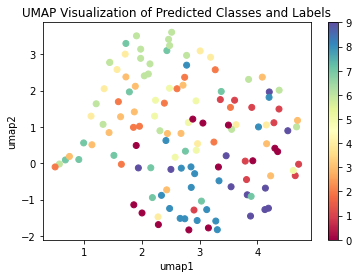

In [12]:
visualize_umap(model, test_loader)

Progress: 1/10 batch
Progress: 2/10 batch
Progress: 3/10 batch
Progress: 4/10 batch
Progress: 5/10 batch
Progress: 6/10 batch
Progress: 7/10 batch
Progress: 8/10 batch
Progress: 9/10 batch
Progress: 10/10 batch


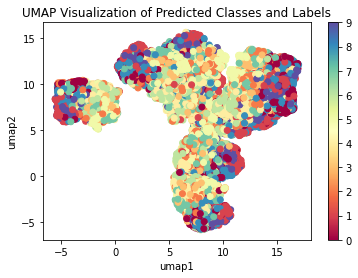

In [15]:
visualize_umap(model, test_loader, mode=1)

Progress: 1/10 batch
Progress: 2/10 batch
Progress: 3/10 batch
Progress: 4/10 batch
Progress: 5/10 batch
Progress: 6/10 batch
Progress: 7/10 batch
Progress: 8/10 batch
Progress: 9/10 batch
Progress: 10/10 batch
Progress: 11/10 batch
Progress: 12/10 batch
Progress: 13/10 batch
Progress: 14/10 batch
Progress: 15/10 batch
Progress: 16/10 batch
Progress: 17/10 batch
Progress: 18/10 batch
Progress: 19/10 batch
Progress: 20/10 batch
Progress: 21/10 batch
Progress: 22/10 batch
Progress: 23/10 batch
Progress: 24/10 batch
Progress: 25/10 batch
Progress: 26/10 batch
Progress: 27/10 batch
Progress: 28/10 batch
Progress: 29/10 batch
Progress: 30/10 batch
Progress: 31/10 batch
Progress: 32/10 batch
Progress: 33/10 batch
Progress: 34/10 batch
Progress: 35/10 batch
Progress: 36/10 batch
Progress: 37/10 batch
Progress: 38/10 batch
Progress: 39/10 batch
Progress: 40/10 batch
Progress: 41/10 batch
Progress: 42/10 batch
Progress: 43/10 batch
Progress: 44/10 batch
Progress: 45/10 batch
Progress: 46/10 bat

Progress: 364/10 batch
Progress: 365/10 batch
Progress: 366/10 batch
Progress: 367/10 batch
Progress: 368/10 batch
Progress: 369/10 batch
Progress: 370/10 batch
Progress: 371/10 batch
Progress: 372/10 batch
Progress: 373/10 batch
Progress: 374/10 batch
Progress: 375/10 batch
Progress: 376/10 batch
Progress: 377/10 batch
Progress: 378/10 batch
Progress: 379/10 batch
Progress: 380/10 batch
Progress: 381/10 batch
Progress: 382/10 batch
Progress: 383/10 batch
Progress: 384/10 batch
Progress: 385/10 batch
Progress: 386/10 batch
Progress: 387/10 batch
Progress: 388/10 batch
Progress: 389/10 batch
Progress: 390/10 batch
Progress: 391/10 batch
Progress: 392/10 batch
Progress: 393/10 batch
Progress: 394/10 batch
Progress: 395/10 batch
Progress: 396/10 batch
Progress: 397/10 batch
Progress: 398/10 batch
Progress: 399/10 batch
Progress: 400/10 batch
Progress: 401/10 batch
Progress: 402/10 batch
Progress: 403/10 batch
Progress: 404/10 batch
Progress: 405/10 batch
Progress: 406/10 batch
Progress: 4

Progress: 744/10 batch
Progress: 745/10 batch
Progress: 746/10 batch
Progress: 747/10 batch
Progress: 748/10 batch
Progress: 749/10 batch
Progress: 750/10 batch
Progress: 751/10 batch
Progress: 752/10 batch
Progress: 753/10 batch
Progress: 754/10 batch
Progress: 755/10 batch
Progress: 756/10 batch
Progress: 757/10 batch
Progress: 758/10 batch
Progress: 759/10 batch
Progress: 760/10 batch
Progress: 761/10 batch
Progress: 762/10 batch
Progress: 763/10 batch
Progress: 764/10 batch
Progress: 765/10 batch
Progress: 766/10 batch
Progress: 767/10 batch
Progress: 768/10 batch
Progress: 769/10 batch
Progress: 770/10 batch
Progress: 771/10 batch
Progress: 772/10 batch
Progress: 773/10 batch
Progress: 774/10 batch
Progress: 775/10 batch
Progress: 776/10 batch
Progress: 777/10 batch
Progress: 778/10 batch
Progress: 779/10 batch
Progress: 780/10 batch
Progress: 781/10 batch
Progress: 782/10 batch
Progress: 783/10 batch
Progress: 784/10 batch
Progress: 785/10 batch
Progress: 786/10 batch
Progress: 7

Progress: 1112/10 batch
Progress: 1113/10 batch
Progress: 1114/10 batch
Progress: 1115/10 batch
Progress: 1116/10 batch
Progress: 1117/10 batch
Progress: 1118/10 batch
Progress: 1119/10 batch
Progress: 1120/10 batch
Progress: 1121/10 batch
Progress: 1122/10 batch
Progress: 1123/10 batch
Progress: 1124/10 batch
Progress: 1125/10 batch
Progress: 1126/10 batch
Progress: 1127/10 batch
Progress: 1128/10 batch
Progress: 1129/10 batch
Progress: 1130/10 batch
Progress: 1131/10 batch
Progress: 1132/10 batch
Progress: 1133/10 batch
Progress: 1134/10 batch
Progress: 1135/10 batch
Progress: 1136/10 batch
Progress: 1137/10 batch
Progress: 1138/10 batch
Progress: 1139/10 batch
Progress: 1140/10 batch
Progress: 1141/10 batch
Progress: 1142/10 batch
Progress: 1143/10 batch
Progress: 1144/10 batch
Progress: 1145/10 batch
Progress: 1146/10 batch
Progress: 1147/10 batch
Progress: 1148/10 batch
Progress: 1149/10 batch
Progress: 1150/10 batch
Progress: 1151/10 batch
Progress: 1152/10 batch
Progress: 1153/1

Progress: 1514/10 batch
Progress: 1515/10 batch
Progress: 1516/10 batch
Progress: 1517/10 batch
Progress: 1518/10 batch
Progress: 1519/10 batch
Progress: 1520/10 batch
Progress: 1521/10 batch
Progress: 1522/10 batch
Progress: 1523/10 batch
Progress: 1524/10 batch
Progress: 1525/10 batch
Progress: 1526/10 batch
Progress: 1527/10 batch
Progress: 1528/10 batch
Progress: 1529/10 batch
Progress: 1530/10 batch
Progress: 1531/10 batch
Progress: 1532/10 batch
Progress: 1533/10 batch
Progress: 1534/10 batch
Progress: 1535/10 batch
Progress: 1536/10 batch
Progress: 1537/10 batch
Progress: 1538/10 batch
Progress: 1539/10 batch
Progress: 1540/10 batch
Progress: 1541/10 batch
Progress: 1542/10 batch
Progress: 1543/10 batch
Progress: 1544/10 batch
Progress: 1545/10 batch
Progress: 1546/10 batch
Progress: 1547/10 batch
Progress: 1548/10 batch
Progress: 1549/10 batch
Progress: 1550/10 batch
Progress: 1551/10 batch
Progress: 1552/10 batch
Progress: 1553/10 batch
Progress: 1554/10 batch
Progress: 1555/1

Progress: 1906/10 batch
Progress: 1907/10 batch
Progress: 1908/10 batch
Progress: 1909/10 batch
Progress: 1910/10 batch
Progress: 1911/10 batch
Progress: 1912/10 batch
Progress: 1913/10 batch
Progress: 1914/10 batch
Progress: 1915/10 batch
Progress: 1916/10 batch
Progress: 1917/10 batch
Progress: 1918/10 batch
Progress: 1919/10 batch
Progress: 1920/10 batch
Progress: 1921/10 batch
Progress: 1922/10 batch
Progress: 1923/10 batch
Progress: 1924/10 batch
Progress: 1925/10 batch
Progress: 1926/10 batch
Progress: 1927/10 batch
Progress: 1928/10 batch
Progress: 1929/10 batch
Progress: 1930/10 batch
Progress: 1931/10 batch
Progress: 1932/10 batch
Progress: 1933/10 batch
Progress: 1934/10 batch
Progress: 1935/10 batch
Progress: 1936/10 batch
Progress: 1937/10 batch
Progress: 1938/10 batch
Progress: 1939/10 batch
Progress: 1940/10 batch
Progress: 1941/10 batch
Progress: 1942/10 batch
Progress: 1943/10 batch
Progress: 1944/10 batch
Progress: 1945/10 batch
Progress: 1946/10 batch
Progress: 1947/1

Progress: 2302/10 batch
Progress: 2303/10 batch
Progress: 2304/10 batch
Progress: 2305/10 batch
Progress: 2306/10 batch
Progress: 2307/10 batch
Progress: 2308/10 batch
Progress: 2309/10 batch
Progress: 2310/10 batch
Progress: 2311/10 batch
Progress: 2312/10 batch
Progress: 2313/10 batch
Progress: 2314/10 batch
Progress: 2315/10 batch
Progress: 2316/10 batch
Progress: 2317/10 batch
Progress: 2318/10 batch
Progress: 2319/10 batch
Progress: 2320/10 batch
Progress: 2321/10 batch
Progress: 2322/10 batch
Progress: 2323/10 batch
Progress: 2324/10 batch
Progress: 2325/10 batch
Progress: 2326/10 batch
Progress: 2327/10 batch
Progress: 2328/10 batch
Progress: 2329/10 batch
Progress: 2330/10 batch
Progress: 2331/10 batch
Progress: 2332/10 batch
Progress: 2333/10 batch
Progress: 2334/10 batch
Progress: 2335/10 batch
Progress: 2336/10 batch
Progress: 2337/10 batch
Progress: 2338/10 batch
Progress: 2339/10 batch
Progress: 2340/10 batch
Progress: 2341/10 batch
Progress: 2342/10 batch
Progress: 2343/1

Progress: 2681/10 batch
Progress: 2682/10 batch
Progress: 2683/10 batch
Progress: 2684/10 batch
Progress: 2685/10 batch
Progress: 2686/10 batch
Progress: 2687/10 batch
Progress: 2688/10 batch
Progress: 2689/10 batch
Progress: 2690/10 batch
Progress: 2691/10 batch
Progress: 2692/10 batch
Progress: 2693/10 batch
Progress: 2694/10 batch
Progress: 2695/10 batch
Progress: 2696/10 batch
Progress: 2697/10 batch
Progress: 2698/10 batch
Progress: 2699/10 batch
Progress: 2700/10 batch
Progress: 2701/10 batch
Progress: 2702/10 batch
Progress: 2703/10 batch
Progress: 2704/10 batch
Progress: 2705/10 batch
Progress: 2706/10 batch
Progress: 2707/10 batch
Progress: 2708/10 batch
Progress: 2709/10 batch
Progress: 2710/10 batch
Progress: 2711/10 batch
Progress: 2712/10 batch
Progress: 2713/10 batch
Progress: 2714/10 batch
Progress: 2715/10 batch
Progress: 2716/10 batch
Progress: 2717/10 batch
Progress: 2718/10 batch
Progress: 2719/10 batch
Progress: 2720/10 batch
Progress: 2721/10 batch
Progress: 2722/1

Progress: 3061/10 batch
Progress: 3062/10 batch
Progress: 3063/10 batch
Progress: 3064/10 batch
Progress: 3065/10 batch
Progress: 3066/10 batch
Progress: 3067/10 batch
Progress: 3068/10 batch
Progress: 3069/10 batch
Progress: 3070/10 batch
Progress: 3071/10 batch
Progress: 3072/10 batch
Progress: 3073/10 batch
Progress: 3074/10 batch
Progress: 3075/10 batch
Progress: 3076/10 batch
Progress: 3077/10 batch
Progress: 3078/10 batch
Progress: 3079/10 batch
Progress: 3080/10 batch
Progress: 3081/10 batch
Progress: 3082/10 batch
Progress: 3083/10 batch
Progress: 3084/10 batch
Progress: 3085/10 batch
Progress: 3086/10 batch
Progress: 3087/10 batch
Progress: 3088/10 batch
Progress: 3089/10 batch
Progress: 3090/10 batch
Progress: 3091/10 batch
Progress: 3092/10 batch
Progress: 3093/10 batch
Progress: 3094/10 batch
Progress: 3095/10 batch
Progress: 3096/10 batch
Progress: 3097/10 batch
Progress: 3098/10 batch
Progress: 3099/10 batch
Progress: 3100/10 batch
Progress: 3101/10 batch
Progress: 3102/1

Progress: 3457/10 batch
Progress: 3458/10 batch
Progress: 3459/10 batch
Progress: 3460/10 batch
Progress: 3461/10 batch
Progress: 3462/10 batch
Progress: 3463/10 batch
Progress: 3464/10 batch
Progress: 3465/10 batch
Progress: 3466/10 batch
Progress: 3467/10 batch
Progress: 3468/10 batch
Progress: 3469/10 batch
Progress: 3470/10 batch
Progress: 3471/10 batch
Progress: 3472/10 batch
Progress: 3473/10 batch
Progress: 3474/10 batch
Progress: 3475/10 batch
Progress: 3476/10 batch
Progress: 3477/10 batch
Progress: 3478/10 batch
Progress: 3479/10 batch
Progress: 3480/10 batch
Progress: 3481/10 batch
Progress: 3482/10 batch
Progress: 3483/10 batch
Progress: 3484/10 batch
Progress: 3485/10 batch
Progress: 3486/10 batch
Progress: 3487/10 batch
Progress: 3488/10 batch
Progress: 3489/10 batch
Progress: 3490/10 batch
Progress: 3491/10 batch
Progress: 3492/10 batch
Progress: 3493/10 batch
Progress: 3494/10 batch
Progress: 3495/10 batch
Progress: 3496/10 batch
Progress: 3497/10 batch
Progress: 3498/1

Progress: 3848/10 batch
Progress: 3849/10 batch
Progress: 3850/10 batch
Progress: 3851/10 batch
Progress: 3852/10 batch
Progress: 3853/10 batch
Progress: 3854/10 batch
Progress: 3855/10 batch
Progress: 3856/10 batch
Progress: 3857/10 batch
Progress: 3858/10 batch
Progress: 3859/10 batch
Progress: 3860/10 batch
Progress: 3861/10 batch
Progress: 3862/10 batch
Progress: 3863/10 batch
Progress: 3864/10 batch
Progress: 3865/10 batch
Progress: 3866/10 batch
Progress: 3867/10 batch
Progress: 3868/10 batch
Progress: 3869/10 batch
Progress: 3870/10 batch
Progress: 3871/10 batch
Progress: 3872/10 batch
Progress: 3873/10 batch
Progress: 3874/10 batch
Progress: 3875/10 batch
Progress: 3876/10 batch
Progress: 3877/10 batch
Progress: 3878/10 batch
Progress: 3879/10 batch
Progress: 3880/10 batch
Progress: 3881/10 batch
Progress: 3882/10 batch
Progress: 3883/10 batch
Progress: 3884/10 batch
Progress: 3885/10 batch
Progress: 3886/10 batch
Progress: 3887/10 batch
Progress: 3888/10 batch
Progress: 3889/1

Progress: 4234/10 batch
Progress: 4235/10 batch
Progress: 4236/10 batch
Progress: 4237/10 batch
Progress: 4238/10 batch
Progress: 4239/10 batch
Progress: 4240/10 batch
Progress: 4241/10 batch
Progress: 4242/10 batch
Progress: 4243/10 batch
Progress: 4244/10 batch
Progress: 4245/10 batch
Progress: 4246/10 batch
Progress: 4247/10 batch
Progress: 4248/10 batch
Progress: 4249/10 batch
Progress: 4250/10 batch
Progress: 4251/10 batch
Progress: 4252/10 batch
Progress: 4253/10 batch
Progress: 4254/10 batch
Progress: 4255/10 batch
Progress: 4256/10 batch
Progress: 4257/10 batch
Progress: 4258/10 batch
Progress: 4259/10 batch
Progress: 4260/10 batch
Progress: 4261/10 batch
Progress: 4262/10 batch
Progress: 4263/10 batch
Progress: 4264/10 batch
Progress: 4265/10 batch
Progress: 4266/10 batch
Progress: 4267/10 batch
Progress: 4268/10 batch
Progress: 4269/10 batch
Progress: 4270/10 batch
Progress: 4271/10 batch
Progress: 4272/10 batch
Progress: 4273/10 batch
Progress: 4274/10 batch
Progress: 4275/1

Progress: 4613/10 batch
Progress: 4614/10 batch
Progress: 4615/10 batch
Progress: 4616/10 batch
Progress: 4617/10 batch
Progress: 4618/10 batch
Progress: 4619/10 batch
Progress: 4620/10 batch
Progress: 4621/10 batch
Progress: 4622/10 batch
Progress: 4623/10 batch
Progress: 4624/10 batch
Progress: 4625/10 batch
Progress: 4626/10 batch
Progress: 4627/10 batch
Progress: 4628/10 batch
Progress: 4629/10 batch
Progress: 4630/10 batch
Progress: 4631/10 batch
Progress: 4632/10 batch
Progress: 4633/10 batch
Progress: 4634/10 batch
Progress: 4635/10 batch
Progress: 4636/10 batch
Progress: 4637/10 batch
Progress: 4638/10 batch
Progress: 4639/10 batch
Progress: 4640/10 batch
Progress: 4641/10 batch
Progress: 4642/10 batch
Progress: 4643/10 batch
Progress: 4644/10 batch
Progress: 4645/10 batch
Progress: 4646/10 batch
Progress: 4647/10 batch
Progress: 4648/10 batch
Progress: 4649/10 batch
Progress: 4650/10 batch
Progress: 4651/10 batch
Progress: 4652/10 batch
Progress: 4653/10 batch
Progress: 4654/1

Progress: 4994/10 batch
Progress: 4995/10 batch
Progress: 4996/10 batch
Progress: 4997/10 batch
Progress: 4998/10 batch
Progress: 4999/10 batch
Progress: 5000/10 batch
Progress: 5001/10 batch
Progress: 5002/10 batch
Progress: 5003/10 batch
Progress: 5004/10 batch
Progress: 5005/10 batch
Progress: 5006/10 batch
Progress: 5007/10 batch
Progress: 5008/10 batch
Progress: 5009/10 batch
Progress: 5010/10 batch
Progress: 5011/10 batch
Progress: 5012/10 batch
Progress: 5013/10 batch
Progress: 5014/10 batch
Progress: 5015/10 batch
Progress: 5016/10 batch
Progress: 5017/10 batch
Progress: 5018/10 batch
Progress: 5019/10 batch
Progress: 5020/10 batch
Progress: 5021/10 batch
Progress: 5022/10 batch
Progress: 5023/10 batch
Progress: 5024/10 batch
Progress: 5025/10 batch
Progress: 5026/10 batch
Progress: 5027/10 batch
Progress: 5028/10 batch
Progress: 5029/10 batch
Progress: 5030/10 batch
Progress: 5031/10 batch
Progress: 5032/10 batch
Progress: 5033/10 batch
Progress: 5034/10 batch
Progress: 5035/1

Progress: 5381/10 batch
Progress: 5382/10 batch
Progress: 5383/10 batch
Progress: 5384/10 batch
Progress: 5385/10 batch
Progress: 5386/10 batch
Progress: 5387/10 batch
Progress: 5388/10 batch
Progress: 5389/10 batch
Progress: 5390/10 batch
Progress: 5391/10 batch
Progress: 5392/10 batch
Progress: 5393/10 batch
Progress: 5394/10 batch
Progress: 5395/10 batch
Progress: 5396/10 batch
Progress: 5397/10 batch
Progress: 5398/10 batch
Progress: 5399/10 batch
Progress: 5400/10 batch
Progress: 5401/10 batch
Progress: 5402/10 batch
Progress: 5403/10 batch
Progress: 5404/10 batch
Progress: 5405/10 batch
Progress: 5406/10 batch
Progress: 5407/10 batch
Progress: 5408/10 batch
Progress: 5409/10 batch
Progress: 5410/10 batch
Progress: 5411/10 batch
Progress: 5412/10 batch
Progress: 5413/10 batch
Progress: 5414/10 batch
Progress: 5415/10 batch
Progress: 5416/10 batch
Progress: 5417/10 batch
Progress: 5418/10 batch
Progress: 5419/10 batch
Progress: 5420/10 batch
Progress: 5421/10 batch
Progress: 5422/1

Progress: 5767/10 batch
Progress: 5768/10 batch
Progress: 5769/10 batch
Progress: 5770/10 batch
Progress: 5771/10 batch
Progress: 5772/10 batch
Progress: 5773/10 batch
Progress: 5774/10 batch
Progress: 5775/10 batch
Progress: 5776/10 batch
Progress: 5777/10 batch
Progress: 5778/10 batch
Progress: 5779/10 batch
Progress: 5780/10 batch
Progress: 5781/10 batch
Progress: 5782/10 batch
Progress: 5783/10 batch
Progress: 5784/10 batch
Progress: 5785/10 batch
Progress: 5786/10 batch
Progress: 5787/10 batch
Progress: 5788/10 batch
Progress: 5789/10 batch
Progress: 5790/10 batch
Progress: 5791/10 batch
Progress: 5792/10 batch
Progress: 5793/10 batch
Progress: 5794/10 batch
Progress: 5795/10 batch
Progress: 5796/10 batch
Progress: 5797/10 batch
Progress: 5798/10 batch
Progress: 5799/10 batch
Progress: 5800/10 batch
Progress: 5801/10 batch
Progress: 5802/10 batch
Progress: 5803/10 batch
Progress: 5804/10 batch
Progress: 5805/10 batch
Progress: 5806/10 batch
Progress: 5807/10 batch
Progress: 5808/1

Progress: 6150/10 batch
Progress: 6151/10 batch
Progress: 6152/10 batch
Progress: 6153/10 batch
Progress: 6154/10 batch
Progress: 6155/10 batch
Progress: 6156/10 batch
Progress: 6157/10 batch
Progress: 6158/10 batch
Progress: 6159/10 batch
Progress: 6160/10 batch
Progress: 6161/10 batch
Progress: 6162/10 batch
Progress: 6163/10 batch
Progress: 6164/10 batch
Progress: 6165/10 batch
Progress: 6166/10 batch
Progress: 6167/10 batch
Progress: 6168/10 batch
Progress: 6169/10 batch
Progress: 6170/10 batch
Progress: 6171/10 batch
Progress: 6172/10 batch
Progress: 6173/10 batch
Progress: 6174/10 batch
Progress: 6175/10 batch
Progress: 6176/10 batch
Progress: 6177/10 batch
Progress: 6178/10 batch
Progress: 6179/10 batch
Progress: 6180/10 batch
Progress: 6181/10 batch
Progress: 6182/10 batch
Progress: 6183/10 batch
Progress: 6184/10 batch
Progress: 6185/10 batch
Progress: 6186/10 batch
Progress: 6187/10 batch
Progress: 6188/10 batch
Progress: 6189/10 batch
Progress: 6190/10 batch
Progress: 6191/1

Progress: 6512/10 batch
Progress: 6513/10 batch
Progress: 6514/10 batch
Progress: 6515/10 batch
Progress: 6516/10 batch
Progress: 6517/10 batch
Progress: 6518/10 batch
Progress: 6519/10 batch
Progress: 6520/10 batch
Progress: 6521/10 batch
Progress: 6522/10 batch
Progress: 6523/10 batch
Progress: 6524/10 batch
Progress: 6525/10 batch
Progress: 6526/10 batch
Progress: 6527/10 batch
Progress: 6528/10 batch
Progress: 6529/10 batch
Progress: 6530/10 batch
Progress: 6531/10 batch
Progress: 6532/10 batch
Progress: 6533/10 batch
Progress: 6534/10 batch
Progress: 6535/10 batch
Progress: 6536/10 batch
Progress: 6537/10 batch
Progress: 6538/10 batch
Progress: 6539/10 batch
Progress: 6540/10 batch
Progress: 6541/10 batch
Progress: 6542/10 batch
Progress: 6543/10 batch
Progress: 6544/10 batch
Progress: 6545/10 batch
Progress: 6546/10 batch
Progress: 6547/10 batch
Progress: 6548/10 batch
Progress: 6549/10 batch
Progress: 6550/10 batch
Progress: 6551/10 batch
Progress: 6552/10 batch
Progress: 6553/1

Progress: 6895/10 batch
Progress: 6896/10 batch
Progress: 6897/10 batch
Progress: 6898/10 batch
Progress: 6899/10 batch
Progress: 6900/10 batch
Progress: 6901/10 batch
Progress: 6902/10 batch
Progress: 6903/10 batch
Progress: 6904/10 batch
Progress: 6905/10 batch
Progress: 6906/10 batch
Progress: 6907/10 batch
Progress: 6908/10 batch
Progress: 6909/10 batch
Progress: 6910/10 batch
Progress: 6911/10 batch
Progress: 6912/10 batch
Progress: 6913/10 batch
Progress: 6914/10 batch
Progress: 6915/10 batch
Progress: 6916/10 batch
Progress: 6917/10 batch
Progress: 6918/10 batch
Progress: 6919/10 batch
Progress: 6920/10 batch
Progress: 6921/10 batch
Progress: 6922/10 batch
Progress: 6923/10 batch
Progress: 6924/10 batch
Progress: 6925/10 batch
Progress: 6926/10 batch
Progress: 6927/10 batch
Progress: 6928/10 batch
Progress: 6929/10 batch
Progress: 6930/10 batch
Progress: 6931/10 batch
Progress: 6932/10 batch
Progress: 6933/10 batch
Progress: 6934/10 batch
Progress: 6935/10 batch
Progress: 6936/1

Progress: 7298/10 batch
Progress: 7299/10 batch
Progress: 7300/10 batch
Progress: 7301/10 batch
Progress: 7302/10 batch
Progress: 7303/10 batch
Progress: 7304/10 batch
Progress: 7305/10 batch
Progress: 7306/10 batch
Progress: 7307/10 batch
Progress: 7308/10 batch
Progress: 7309/10 batch
Progress: 7310/10 batch
Progress: 7311/10 batch
Progress: 7312/10 batch
Progress: 7313/10 batch
Progress: 7314/10 batch
Progress: 7315/10 batch
Progress: 7316/10 batch
Progress: 7317/10 batch
Progress: 7318/10 batch
Progress: 7319/10 batch
Progress: 7320/10 batch
Progress: 7321/10 batch
Progress: 7322/10 batch
Progress: 7323/10 batch
Progress: 7324/10 batch
Progress: 7325/10 batch
Progress: 7326/10 batch
Progress: 7327/10 batch
Progress: 7328/10 batch
Progress: 7329/10 batch
Progress: 7330/10 batch
Progress: 7331/10 batch
Progress: 7332/10 batch
Progress: 7333/10 batch
Progress: 7334/10 batch
Progress: 7335/10 batch
Progress: 7336/10 batch
Progress: 7337/10 batch
Progress: 7338/10 batch
Progress: 7339/1

Progress: 7700/10 batch
Progress: 7701/10 batch
Progress: 7702/10 batch
Progress: 7703/10 batch
Progress: 7704/10 batch
Progress: 7705/10 batch
Progress: 7706/10 batch
Progress: 7707/10 batch
Progress: 7708/10 batch
Progress: 7709/10 batch
Progress: 7710/10 batch
Progress: 7711/10 batch
Progress: 7712/10 batch
Progress: 7713/10 batch
Progress: 7714/10 batch
Progress: 7715/10 batch
Progress: 7716/10 batch
Progress: 7717/10 batch
Progress: 7718/10 batch
Progress: 7719/10 batch
Progress: 7720/10 batch
Progress: 7721/10 batch
Progress: 7722/10 batch
Progress: 7723/10 batch
Progress: 7724/10 batch
Progress: 7725/10 batch
Progress: 7726/10 batch
Progress: 7727/10 batch
Progress: 7728/10 batch
Progress: 7729/10 batch
Progress: 7730/10 batch
Progress: 7731/10 batch
Progress: 7732/10 batch
Progress: 7733/10 batch
Progress: 7734/10 batch
Progress: 7735/10 batch
Progress: 7736/10 batch
Progress: 7737/10 batch
Progress: 7738/10 batch
Progress: 7739/10 batch
Progress: 7740/10 batch
Progress: 7741/1

Progress: 8099/10 batch
Progress: 8100/10 batch
Progress: 8101/10 batch
Progress: 8102/10 batch
Progress: 8103/10 batch
Progress: 8104/10 batch
Progress: 8105/10 batch
Progress: 8106/10 batch
Progress: 8107/10 batch
Progress: 8108/10 batch
Progress: 8109/10 batch
Progress: 8110/10 batch
Progress: 8111/10 batch
Progress: 8112/10 batch
Progress: 8113/10 batch
Progress: 8114/10 batch
Progress: 8115/10 batch
Progress: 8116/10 batch
Progress: 8117/10 batch
Progress: 8118/10 batch
Progress: 8119/10 batch
Progress: 8120/10 batch
Progress: 8121/10 batch
Progress: 8122/10 batch
Progress: 8123/10 batch
Progress: 8124/10 batch
Progress: 8125/10 batch
Progress: 8126/10 batch
Progress: 8127/10 batch
Progress: 8128/10 batch
Progress: 8129/10 batch
Progress: 8130/10 batch
Progress: 8131/10 batch
Progress: 8132/10 batch
Progress: 8133/10 batch
Progress: 8134/10 batch
Progress: 8135/10 batch
Progress: 8136/10 batch
Progress: 8137/10 batch
Progress: 8138/10 batch
Progress: 8139/10 batch
Progress: 8140/1

Progress: 8461/10 batch
Progress: 8462/10 batch
Progress: 8463/10 batch
Progress: 8464/10 batch
Progress: 8465/10 batch
Progress: 8466/10 batch
Progress: 8467/10 batch
Progress: 8468/10 batch
Progress: 8469/10 batch
Progress: 8470/10 batch
Progress: 8471/10 batch
Progress: 8472/10 batch
Progress: 8473/10 batch
Progress: 8474/10 batch
Progress: 8475/10 batch
Progress: 8476/10 batch
Progress: 8477/10 batch
Progress: 8478/10 batch
Progress: 8479/10 batch
Progress: 8480/10 batch
Progress: 8481/10 batch
Progress: 8482/10 batch
Progress: 8483/10 batch
Progress: 8484/10 batch
Progress: 8485/10 batch
Progress: 8486/10 batch
Progress: 8487/10 batch
Progress: 8488/10 batch
Progress: 8489/10 batch
Progress: 8490/10 batch
Progress: 8491/10 batch
Progress: 8492/10 batch
Progress: 8493/10 batch
Progress: 8494/10 batch
Progress: 8495/10 batch
Progress: 8496/10 batch
Progress: 8497/10 batch
Progress: 8498/10 batch
Progress: 8499/10 batch
Progress: 8500/10 batch
Progress: 8501/10 batch
Progress: 8502/1

Progress: 8833/10 batch
Progress: 8834/10 batch
Progress: 8835/10 batch
Progress: 8836/10 batch
Progress: 8837/10 batch
Progress: 8838/10 batch
Progress: 8839/10 batch
Progress: 8840/10 batch
Progress: 8841/10 batch
Progress: 8842/10 batch
Progress: 8843/10 batch
Progress: 8844/10 batch
Progress: 8845/10 batch
Progress: 8846/10 batch
Progress: 8847/10 batch
Progress: 8848/10 batch
Progress: 8849/10 batch
Progress: 8850/10 batch
Progress: 8851/10 batch
Progress: 8852/10 batch
Progress: 8853/10 batch
Progress: 8854/10 batch
Progress: 8855/10 batch
Progress: 8856/10 batch
Progress: 8857/10 batch
Progress: 8858/10 batch
Progress: 8859/10 batch
Progress: 8860/10 batch
Progress: 8861/10 batch
Progress: 8862/10 batch
Progress: 8863/10 batch
Progress: 8864/10 batch
Progress: 8865/10 batch
Progress: 8866/10 batch
Progress: 8867/10 batch
Progress: 8868/10 batch
Progress: 8869/10 batch
Progress: 8870/10 batch
Progress: 8871/10 batch
Progress: 8872/10 batch
Progress: 8873/10 batch
Progress: 8874/1

Progress: 9218/10 batch
Progress: 9219/10 batch
Progress: 9220/10 batch
Progress: 9221/10 batch
Progress: 9222/10 batch
Progress: 9223/10 batch
Progress: 9224/10 batch
Progress: 9225/10 batch
Progress: 9226/10 batch
Progress: 9227/10 batch
Progress: 9228/10 batch
Progress: 9229/10 batch
Progress: 9230/10 batch
Progress: 9231/10 batch
Progress: 9232/10 batch
Progress: 9233/10 batch
Progress: 9234/10 batch
Progress: 9235/10 batch
Progress: 9236/10 batch
Progress: 9237/10 batch
Progress: 9238/10 batch
Progress: 9239/10 batch
Progress: 9240/10 batch
Progress: 9241/10 batch
Progress: 9242/10 batch
Progress: 9243/10 batch
Progress: 9244/10 batch
Progress: 9245/10 batch
Progress: 9246/10 batch
Progress: 9247/10 batch
Progress: 9248/10 batch
Progress: 9249/10 batch
Progress: 9250/10 batch
Progress: 9251/10 batch
Progress: 9252/10 batch
Progress: 9253/10 batch
Progress: 9254/10 batch
Progress: 9255/10 batch
Progress: 9256/10 batch
Progress: 9257/10 batch
Progress: 9258/10 batch
Progress: 9259/1

Progress: 9604/10 batch
Progress: 9605/10 batch
Progress: 9606/10 batch
Progress: 9607/10 batch
Progress: 9608/10 batch
Progress: 9609/10 batch
Progress: 9610/10 batch
Progress: 9611/10 batch
Progress: 9612/10 batch
Progress: 9613/10 batch
Progress: 9614/10 batch
Progress: 9615/10 batch
Progress: 9616/10 batch
Progress: 9617/10 batch
Progress: 9618/10 batch
Progress: 9619/10 batch
Progress: 9620/10 batch
Progress: 9621/10 batch
Progress: 9622/10 batch
Progress: 9623/10 batch
Progress: 9624/10 batch
Progress: 9625/10 batch
Progress: 9626/10 batch
Progress: 9627/10 batch
Progress: 9628/10 batch
Progress: 9629/10 batch
Progress: 9630/10 batch
Progress: 9631/10 batch
Progress: 9632/10 batch
Progress: 9633/10 batch
Progress: 9634/10 batch
Progress: 9635/10 batch
Progress: 9636/10 batch
Progress: 9637/10 batch
Progress: 9638/10 batch
Progress: 9639/10 batch
Progress: 9640/10 batch
Progress: 9641/10 batch
Progress: 9642/10 batch
Progress: 9643/10 batch
Progress: 9644/10 batch
Progress: 9645/1

Progress: 9973/10 batch
Progress: 9974/10 batch
Progress: 9975/10 batch
Progress: 9976/10 batch
Progress: 9977/10 batch
Progress: 9978/10 batch
Progress: 9979/10 batch
Progress: 9980/10 batch
Progress: 9981/10 batch
Progress: 9982/10 batch
Progress: 9983/10 batch
Progress: 9984/10 batch
Progress: 9985/10 batch
Progress: 9986/10 batch
Progress: 9987/10 batch
Progress: 9988/10 batch
Progress: 9989/10 batch
Progress: 9990/10 batch
Progress: 9991/10 batch
Progress: 9992/10 batch
Progress: 9993/10 batch
Progress: 9994/10 batch
Progress: 9995/10 batch
Progress: 9996/10 batch
Progress: 9997/10 batch
Progress: 9998/10 batch
Progress: 9999/10 batch
Progress: 10000/10 batch
10000
torch.Size([1, 3, 100, 100])


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


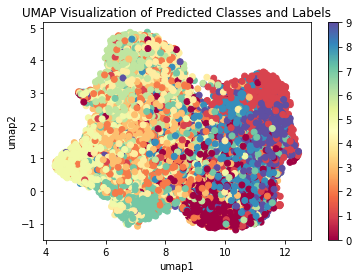

In [6]:
visualize_umap(model, test_loader, mode=2)